### import librairies

In [60]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

### Load the data

In [61]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()



### Split dataset into train and test

In [62]:
# Preprocess the data
x_train = x_train.reshape((60000, 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((10000, 28, 28, 1)).astype('float32') / 255

### Hot encode the labels

In [63]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

### build the model

In [90]:

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

### Compile and optimize the model

In [93]:
# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Train the model

In [94]:
# Train the model
model.fit(x_train, y_train, epochs=15, batch_size=64, validation_data=(x_test, y_test))

# metrics
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_acc}')

Epoch 1/15
938/938 [==============================] - 8s 8ms/step - loss: 1.8203 - accuracy: 0.6270 - val_loss: 1.2355 - val_accuracy: 0.8312
Epoch 2/15
938/938 [==============================] - 8s 8ms/step - loss: 0.8978 - accuracy: 0.8439 - val_loss: 0.6436 - val_accuracy: 0.8780
Epoch 3/15
938/938 [==============================] - 7s 8ms/step - loss: 0.5491 - accuracy: 0.8781 - val_loss: 0.4499 - val_accuracy: 0.8988
Epoch 4/15
938/938 [==============================] - 7s 7ms/step - loss: 0.4174 - accuracy: 0.8962 - val_loss: 0.3632 - val_accuracy: 0.9113
Epoch 5/15
938/938 [==============================] - 7s 8ms/step - loss: 0.3518 - accuracy: 0.9074 - val_loss: 0.3159 - val_accuracy: 0.9191
Epoch 6/15
938/938 [==============================] - 7s 7ms/step - loss: 0.3124 - accuracy: 0.9153 - val_loss: 0.2861 - val_accuracy: 0.9237
Epoch 7/15
938/938 [==============================] - 7s 8ms/step - loss: 0.2855 - accuracy: 0.9206 - val_loss: 0.2628 - val_accuracy: 0.9283
Epoch 

### Visualize the output of layers

1/1 [==============================] - 0s 26ms/step


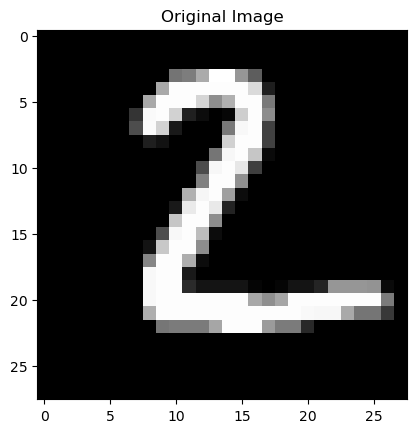

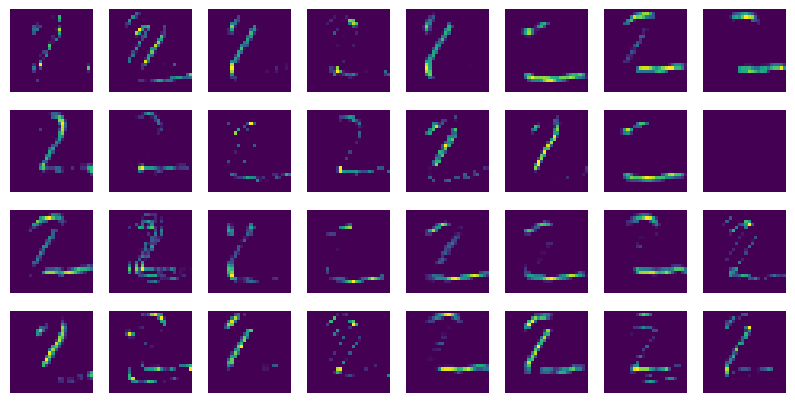

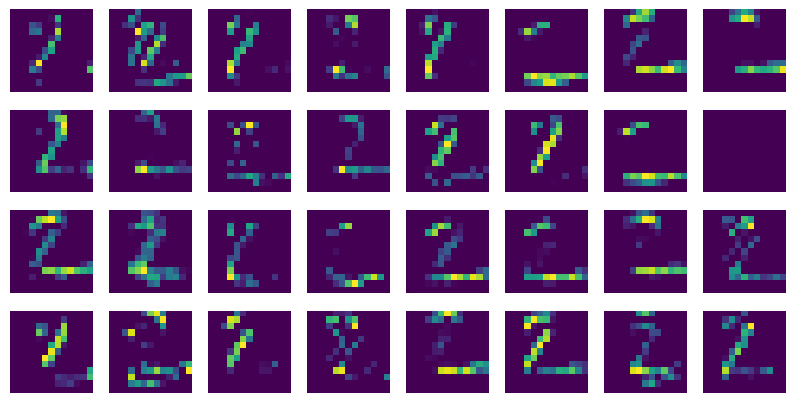

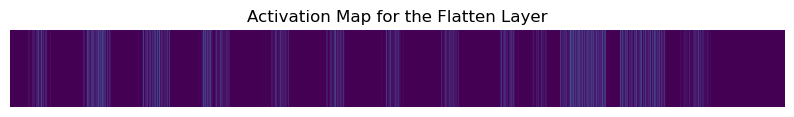

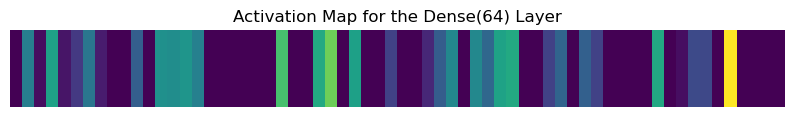

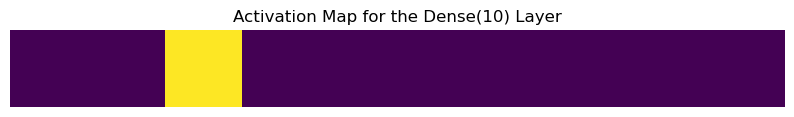

In [87]:
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# Create activation models for each convolutional layer
activation_model_0 = Model(inputs=model.inputs, outputs=model.layers[0].output)
activation_model_1 = Model(inputs=model.inputs, outputs=model.layers[1].output)
activation_model_2 = Model(inputs=model.inputs, outputs=model.layers[2].output)
activation_model_3 = Model(inputs=model.inputs, outputs=model.layers[3].output)
activation_model_4 = Model(inputs=model.inputs, outputs=model.layers[4].output)


# Visualize the activation maps for a specific input image
image = x_test[1].reshape((1, 28, 28, 1))  # Choose the image
activations_0 = activation_model_0.predict(image)
activations_1 = activation_model_1.predict(image)
activations_2 = activation_model_2.predict(image)
activations_3 = activation_model_3.predict(image)
activations_4 = activation_model_4.predict(image)

# Plot the original image
plt.imshow(image.reshape(28, 28), cmap='gray')
plt.title('Original Image')
plt.show()

def plot_activation_maps(layer_activations, layer_name):
    if len(layer_activations.shape) == 4:
        # For Conv2D and MaxPooling2D layers
        plt.figure(figsize=(10, 5))
        for i in range(layer_activations.shape[-1]):
            plt.subplot(4, 8, i + 1)
            plt.imshow(layer_activations[0, :, :, i], cmap='viridis')
            plt.axis('off')
    elif len(layer_activations.shape) == 2:
        # For Flatten and Dense layers
        plt.figure(figsize=(10, 1))
        plt.imshow(layer_activations.reshape(1, -1), cmap='viridis', aspect='auto')
        plt.title(f'Activation Map for the {layer_name} Layer')
        plt.axis('off')
    plt.show()

# Plot activation maps for each layer
plot_activation_maps(activations_0, 'Conv2D')
plot_activation_maps(activations_1, 'MaxPooling2D')
plot_activation_maps(activations_2, 'Flatten')
plot_activation_maps(activations_3, 'Dense(64)')
plot_activation_maps(activations_4, 'Dense(10)')



In [88]:
# Predict on some test samples
predictions = model.predict(x_test[:30])
predicted_labels = tf.argmax(predictions, axis=1)
print("Predicted Labels:", predicted_labels.numpy())



1/1 [==============================] - 0s 36ms/step
Predicted Labels: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 5 4 9 6 6 5 4 0 7 4 0 1]


1/1 [==============================] - 0s 16ms/step


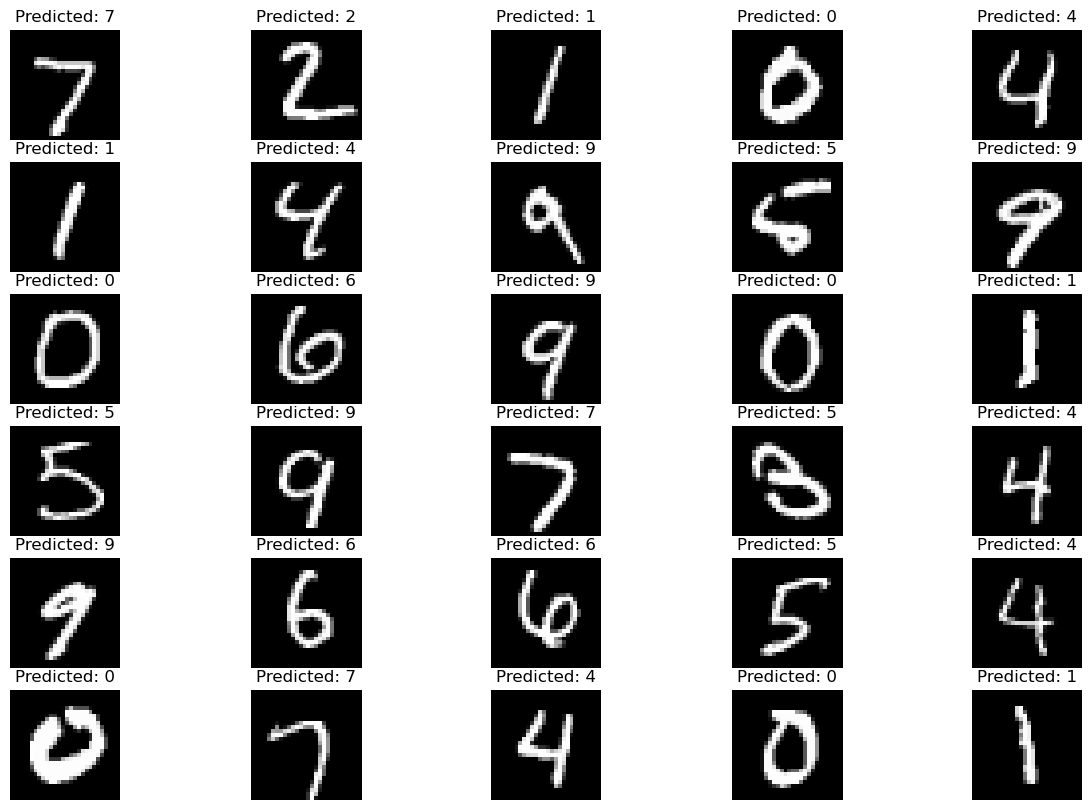

In [89]:
import matplotlib.pyplot as plt
import numpy as np

# Predict on some test samples
predictions = model.predict(x_test[:30])
predicted_labels = tf.argmax(predictions, axis=1)

# Visualize the results
fig, axes = plt.subplots(6, 5, figsize=(15, 10))

for i in range(30):
    # Original image
    axes[i // 5, i % 5].imshow(x_test[i].reshape(28, 28), cmap='gray')
    axes[i // 5, i % 5].set_title(f'Predicted: {predicted_labels[i]}')
    axes[i // 5, i % 5].axis('off')

plt.show()
